In [1]:
import pandas as pd
import numpy as np
import ast

import os
import matplotlib.pyplot as plt
import seaborn as sns
from plinder_analysis_utils import DockingAnalysisBase, PoseBustersAnalysis, PropertyAnalysis

import statsmodels.formula.api as smf


In [2]:
PLINDER_TEST_COLUMNS = [
    "system_id", "ligand_smiles",
    # binary 
    # "ligand_is_covalent", "ligand_is_ion", "ligand_is_cofactor", "ligand_is_artifact",
    # discrete
    "system_num_protein_chains",
    "ligand_num_rot_bonds", "ligand_num_hbd", "ligand_num_hba", "ligand_num_rings",
    # continuous
    "entry_resolution", "entry_validation_molprobity", 
    "system_num_pocket_residues", "system_num_interactions",
    "ligand_molecular_weight", "ligand_crippen_clogp", 
    "ligand_num_interacting_residues", "ligand_num_neighboring_residues", "ligand_num_interactions",
]
# Create category mapping for visualization
CATEGORY_MAPPING = {
    "ligand_is_covalent": "binary",
    "ligand_is_ion": "binary",
    "ligand_is_cofactor": "binary",
    "ligand_is_artifact": "binary",
    "system_num_protein_chains": "discrete",
    "ligand_num_rot_bonds": "continuous",    
    "ligand_num_hbd": "continuous",
    "ligand_num_hba": "continuous",
    "ligand_num_rings": "continuous",
    "entry_resolution": "continuous",
    "entry_validation_molprobity": "continuous",
    "system_num_pocket_residues": "continuous",
    "system_num_interactions": "continuous",
    "ligand_molecular_weight": "continuous",
    "ligand_crippen_clogp": "continuous",
    "ligand_num_interacting_residues": "continuous",
    "ligand_num_neighboring_residues": "continuous",
    "ligand_num_interactions": "continuous",
    "ligand_is_artifact": "binary"     
}

In [3]:
df_combined = pd.read_csv("plinder_set_0_annotated.csv")

/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_7183/2737273468.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv("plinder_set_0_annotated.csv")


In [4]:
# build a boolean mask: drop any row where covalent, ionic or has_ion is True
mask = ~(
    df_combined['ligand_is_covalent'] |
    df_combined['ligand_is_ion'] |
    df_combined['has_ion'] |
    df_combined['ligand_is_cofactor']
)

# filter and reset index
df_combined = df_combined.loc[mask].reset_index(drop=True)
print("Filtered shape:", df_combined.shape)

Filtered shape: (14961, 154)


In [5]:
# First analyze multiple properties
property_analysis = PropertyAnalysis(df_combined)
methods = ["surfdock", "gnina", "chai-1", "diffdock_pocket_only", "icm", "vina"]

## Complementarity Between Physics-based and ML-based: Mixed Effect Analysis

### Prepare the df

In [6]:
MIXED_EFFECT_VARS = [
    "protein", "rmsd","method",
    # "system_id", "ligand_smiles",
    # binary 
    # "ligand_is_covalent", "ligand_is_ion", "ligand_is_cofactor", "ligand_is_artifact",
    # discrete
    # "system_num_protein_chains",
    "ligand_num_rot_bonds", "ligand_num_hbd", "ligand_num_hba", "ligand_num_rings",
    # continuous
    "entry_resolution", "entry_validation_molprobity", 
    # "system_num_pocket_residues", 
    "system_num_interactions",
    "ligand_molecular_weight", "ligand_crippen_clogp", 
    "ligand_num_interacting_residues", 
    "ligand_num_neighboring_residues", 
    # "ligand_num_interactions",
]

In [7]:
df_mixed = df_combined[MIXED_EFFECT_VARS]
# Create a Method_Type column based on the classification
df_mixed['Method_Type'] = df_mixed['method'].apply(
    lambda x: 'ML' if x in ['chai-1', 'diffdock_pocket_only', 'surfdock'] else 'Physics'
)

# Display the counts of each method type
print(df_mixed['Method_Type'].value_counts())

# Verify the classification
for method in df_mixed['method'].unique():
    method_type = 'ML' if method in ['chai-1', 'diffdock_pocket_only', 'surfdock'] else 'Physics'
    print(f"{method}: {method_type}")

Method_Type
ML         7616
Physics    7345
Name: count, dtype: int64
diffdock_pocket_only: ML
gnina: Physics
surfdock: ML
icm: Physics
chai-1: ML
vina: Physics


/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_15969/953947549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mixed['Method_Type'] = df_mixed['method'].apply(


### system_num_protein_chains

/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1050: RuntimeWarning: invalid value encountered in divide
  self._apb * self._apc / self._n)
/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1056: RuntimeWarning: invalid value encountered in divide
  denom /= (self._n**2 * (self._n - 1))


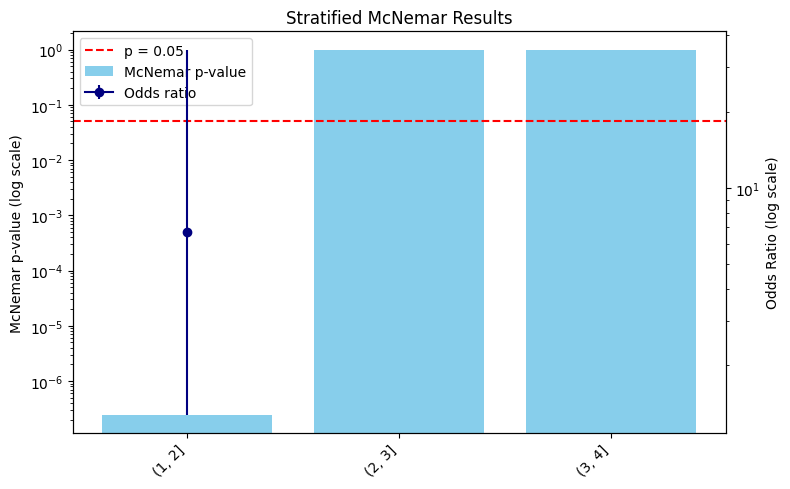

Stratified McNemar p = {'oddsratio': nan, 'pvalue': nan}


/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1050: RuntimeWarning: invalid value encountered in divide
  self._apb * self._apc / self._n)
/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1056: RuntimeWarning: invalid value encountered in divide
  denom /= (self._n**2 * (self._n - 1))


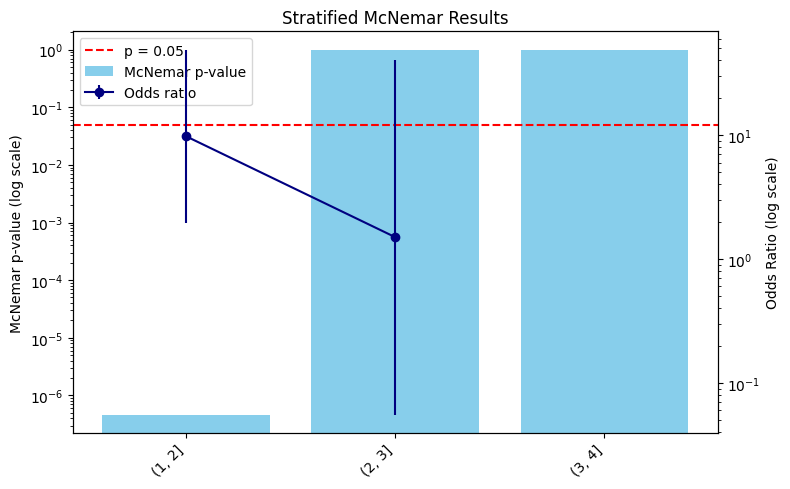

Stratified McNemar p = {'oddsratio': nan, 'pvalue': nan}


/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1050: RuntimeWarning: invalid value encountered in divide
  self._apb * self._apc / self._n)
/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1056: RuntimeWarning: invalid value encountered in divide
  denom /= (self._n**2 * (self._n - 1))


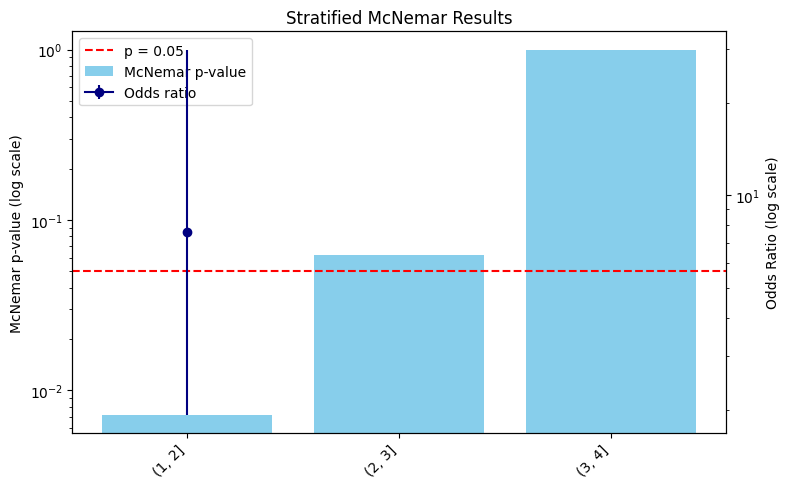

Stratified McNemar p = {'oddsratio': nan, 'pvalue': nan}


In [25]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="system_num_protein_chains",
    bins=[1,2,3,4]
)
print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="system_num_protein_chains",
    bins=[1,2,3,4]
)
print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="system_num_protein_chains",
    bins=[1,2,3,4]
)
print("Stratified McNemar p =", stratified_analysis['cmh'])

### ligand_num_rot_bonds

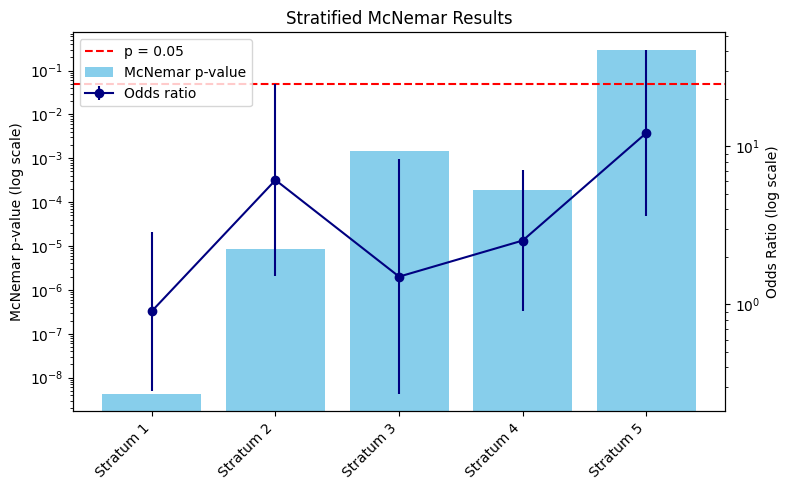

Stratified McNemar p = {'oddsratio': 18.93482706837243, 'pvalue': 1.3526072581204751e-05}


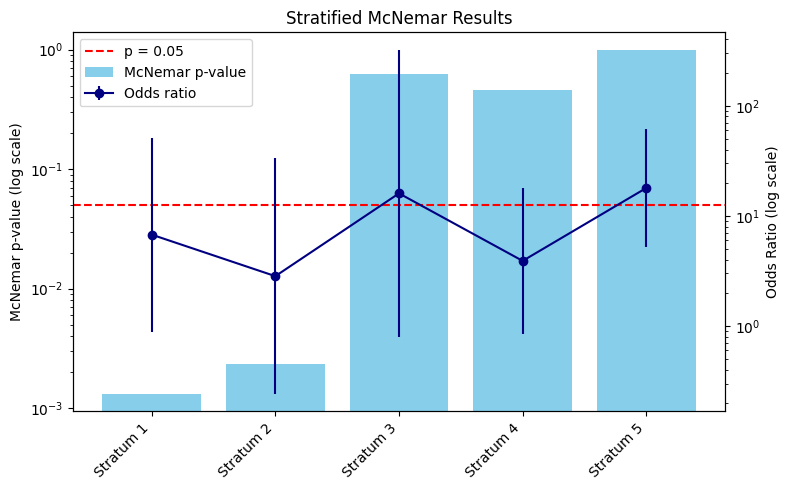

Stratified McNemar p = {'oddsratio': 36.78470482002666, 'pvalue': 1.3192118508698059e-09}


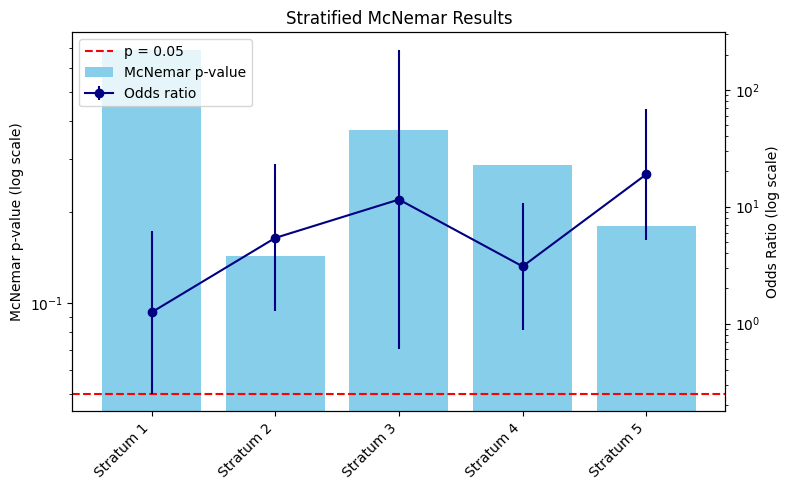

Stratified McNemar p = {'oddsratio': 30.918837787716548, 'pvalue': 2.6904755201506703e-08}


In [14]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_rot_bonds",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_rot_bonds",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_rot_bonds",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

### ligand_num_hbd

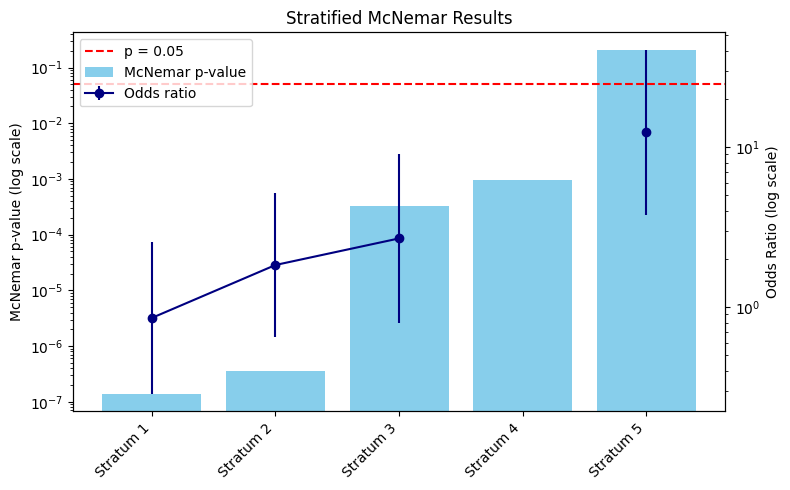

Stratified McNemar p = {'oddsratio': 17.07275809965474, 'pvalue': 3.597465423410551e-05}


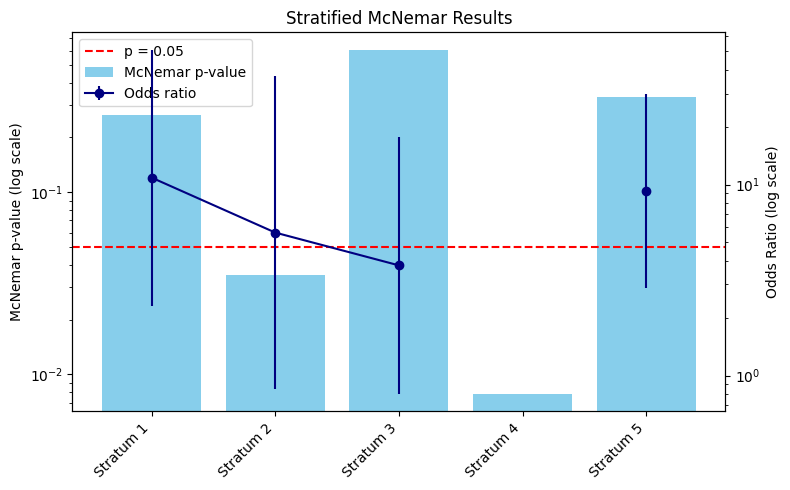

Stratified McNemar p = {'oddsratio': 36.72145267622146, 'pvalue': 1.3627157180451377e-09}


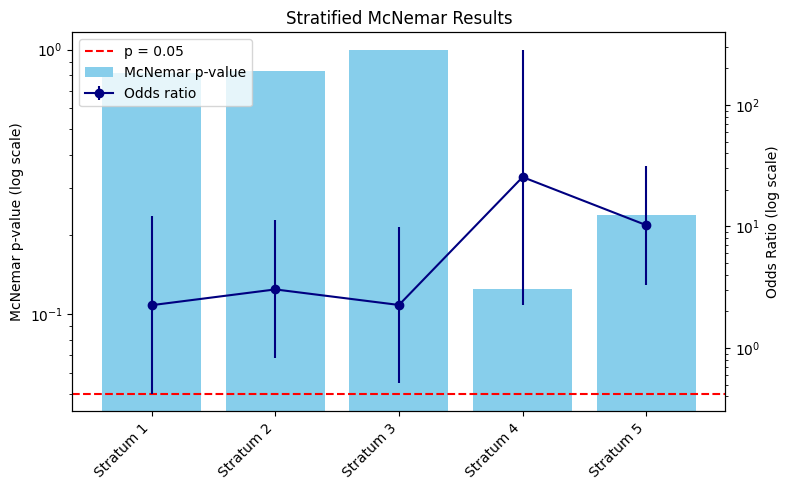

Stratified McNemar p = {'oddsratio': 28.84530267065051, 'pvalue': 7.839579763135873e-08}


In [15]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_hbd",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_hbd",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_hbd",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

#### ligand_num_hba

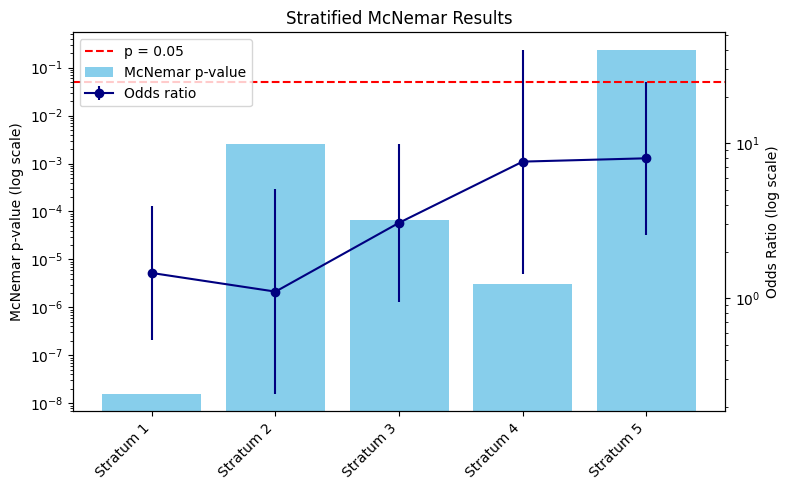

Stratified McNemar p = {'oddsratio': 17.613568707021006, 'pvalue': 2.706503869820409e-05}


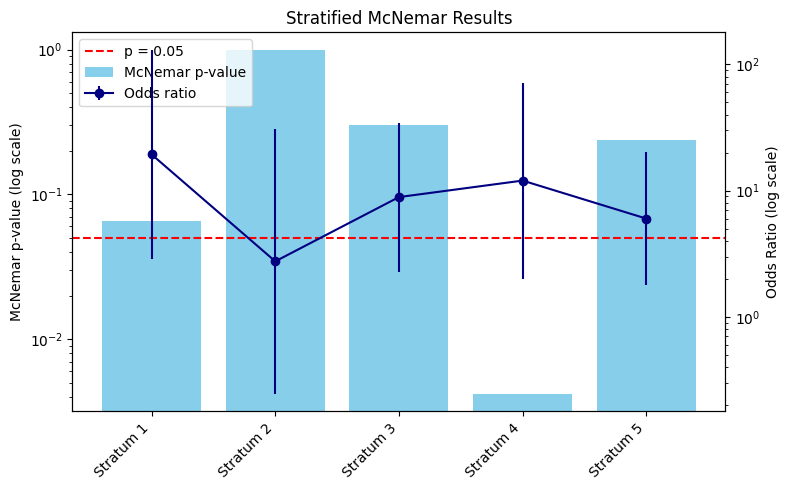

Stratified McNemar p = {'oddsratio': 41.18133924138145, 'pvalue': 1.387407966291221e-10}


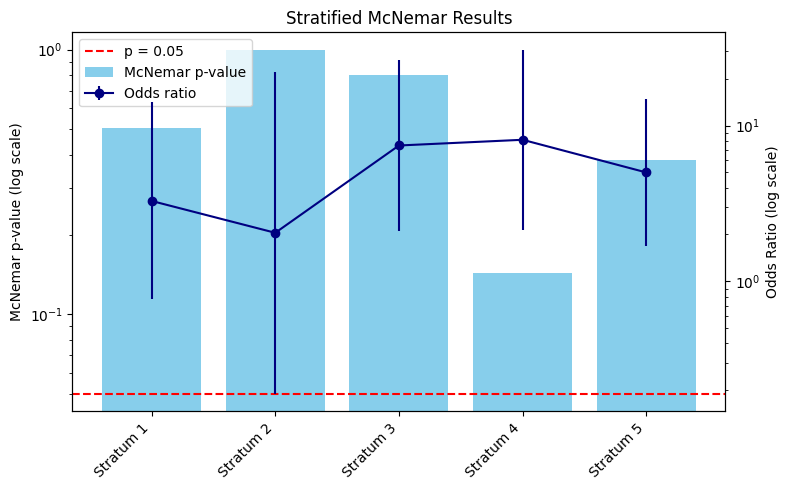

Stratified McNemar p = {'oddsratio': 32.727802753008554, 'pvalue': 1.0601000077770095e-08}


In [16]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_hba",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_hba",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_hba",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

### ligand_num_rings

In [33]:
df_combined['ligand_num_rings'].value_counts()

ligand_num_rings
2.0     3910
3.0     2992
4.0     1917
1.0     1403
5.0      742
0.0      619
6.0      400
7.0      160
12.0      10
Name: count, dtype: int64

/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1050: RuntimeWarning: invalid value encountered in divide
  self._apb * self._apc / self._n)
/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1056: RuntimeWarning: invalid value encountered in divide
  denom /= (self._n**2 * (self._n - 1))


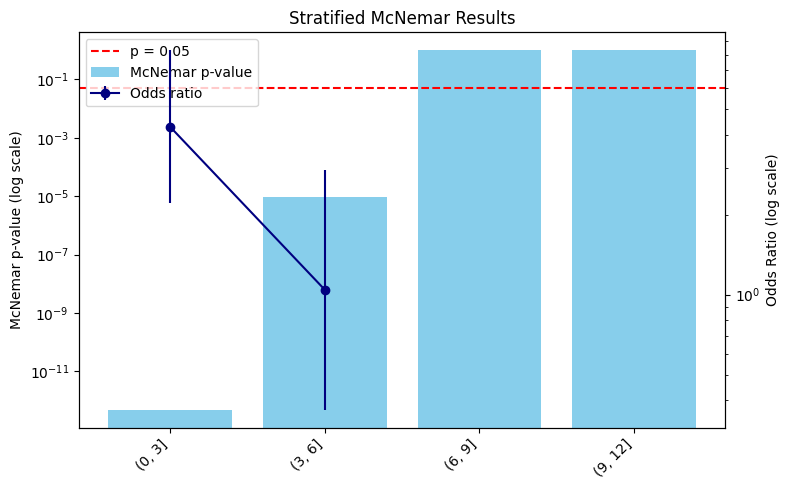

/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1056: RuntimeWarning: invalid value encountered in divide
  denom /= (self._n**2 * (self._n - 1))


Stratified McNemar p = {'oddsratio': nan, 'pvalue': nan}


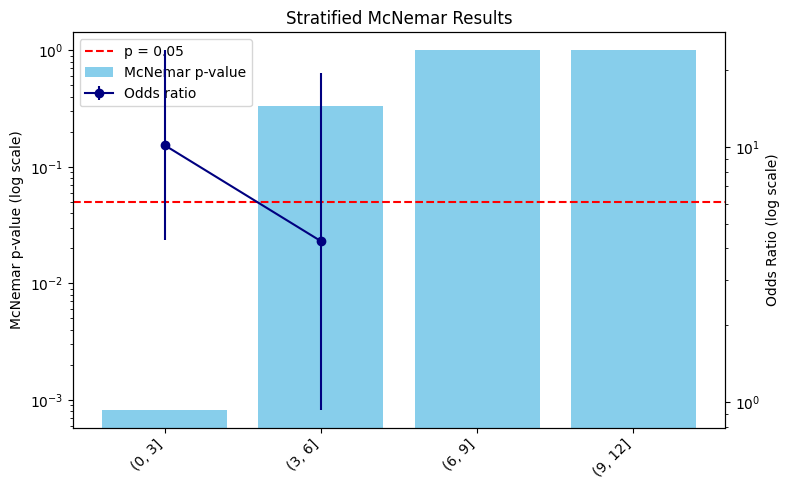

Stratified McNemar p = {'oddsratio': nan, 'pvalue': nan}


/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1050: RuntimeWarning: invalid value encountered in divide
  self._apb * self._apc / self._n)
/Users/aoxu/miniconda3/envs/molpal/lib/python3.8/site-packages/statsmodels/stats/contingency_tables.py:1056: RuntimeWarning: invalid value encountered in divide
  denom /= (self._n**2 * (self._n - 1))


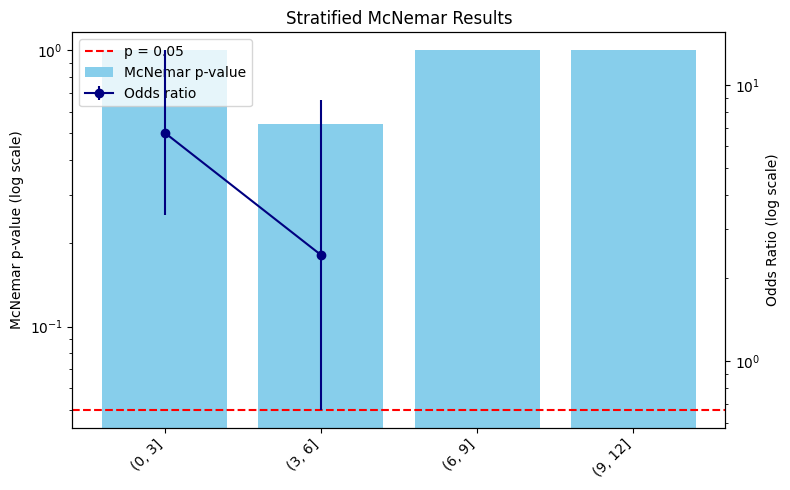

Stratified McNemar p = {'oddsratio': nan, 'pvalue': nan}


In [34]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_rings",
    bins=[0,3,6,9,12]
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_rings",
    bins=[0,3,6,9,12]
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_rings",
    bins=[0,3,6,9,12]
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

### entry_resolution

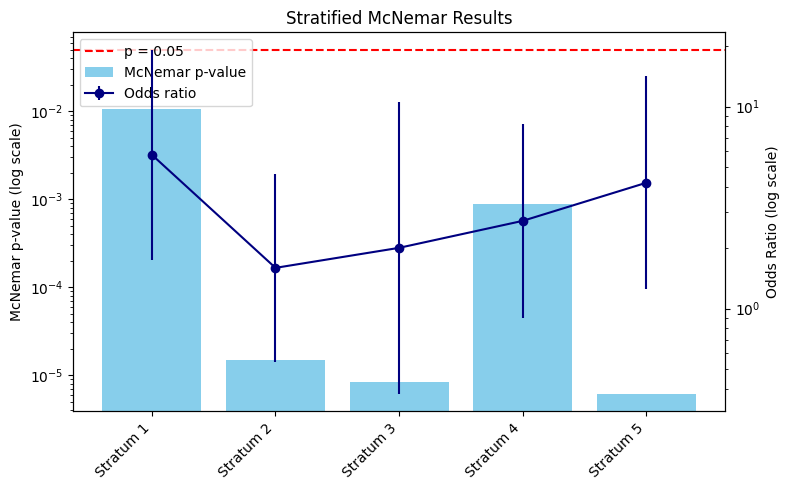

Stratified McNemar p = {'oddsratio': 16.477767305716792, 'pvalue': 4.9223917696905595e-05}


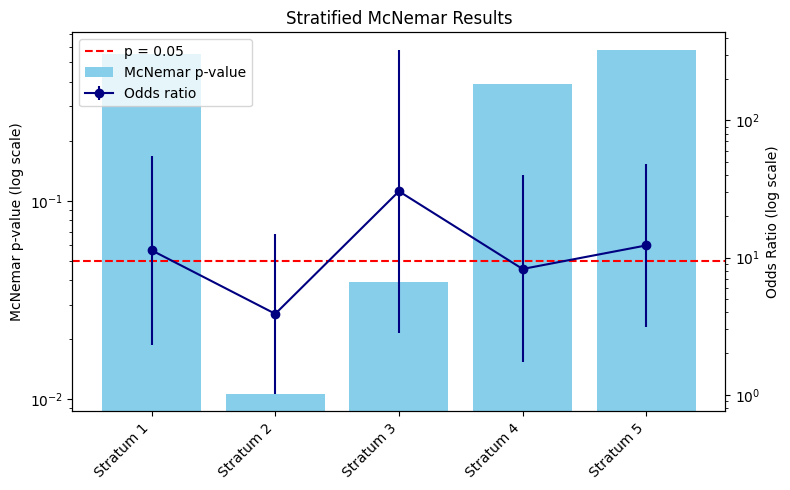

Stratified McNemar p = {'oddsratio': 49.95853401189562, 'pvalue': 1.5702994460298214e-12}


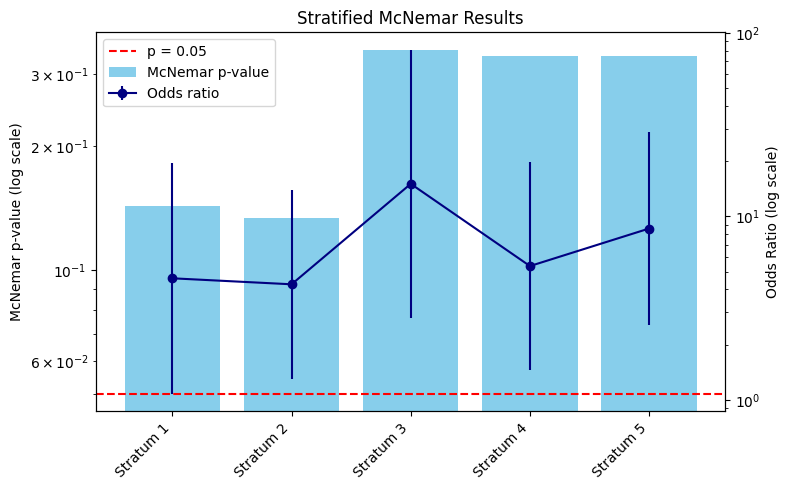

Stratified McNemar p = {'oddsratio': 42.57965700402817, 'pvalue': 6.786149420179299e-11}


In [18]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="entry_resolution",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="entry_resolution",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="entry_resolution",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

### entry_validation_molprobity

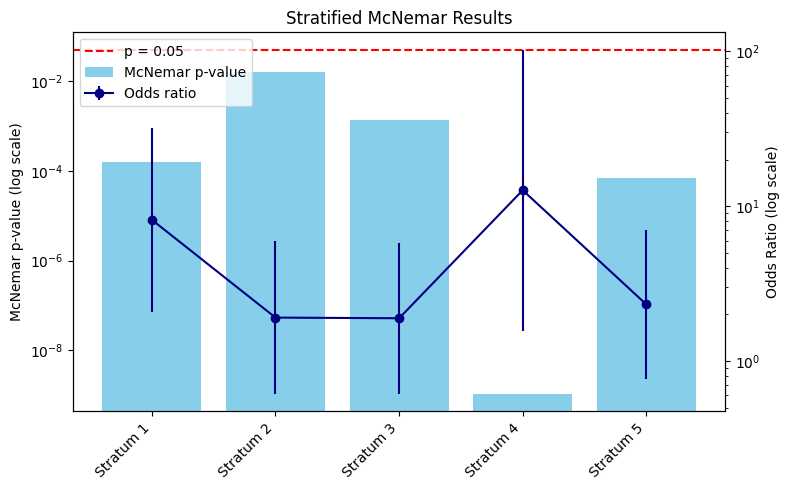

Stratified McNemar p = {'oddsratio': 19.478015343837807, 'pvalue': 1.0176421893270948e-05}


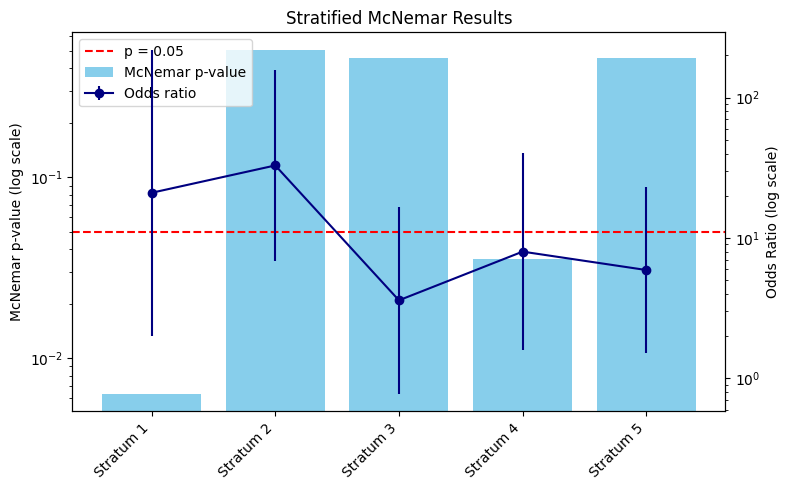

Stratified McNemar p = {'oddsratio': 53.095266271848985, 'pvalue': 3.177458296477198e-13}


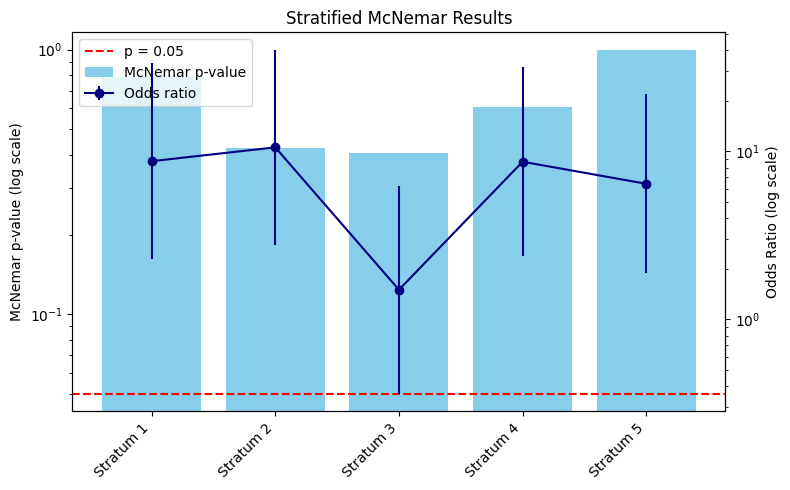

Stratified McNemar p = {'oddsratio': 43.317951609570926, 'pvalue': 4.652955798434277e-11}


In [19]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="entry_validation_molprobity",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="entry_validation_molprobity",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="entry_validation_molprobity",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

### system_pocket_residues

### system_num_interactions

### ligand_molecular_weight

### ligand_crippen_clogp

### ligand_num_interactions

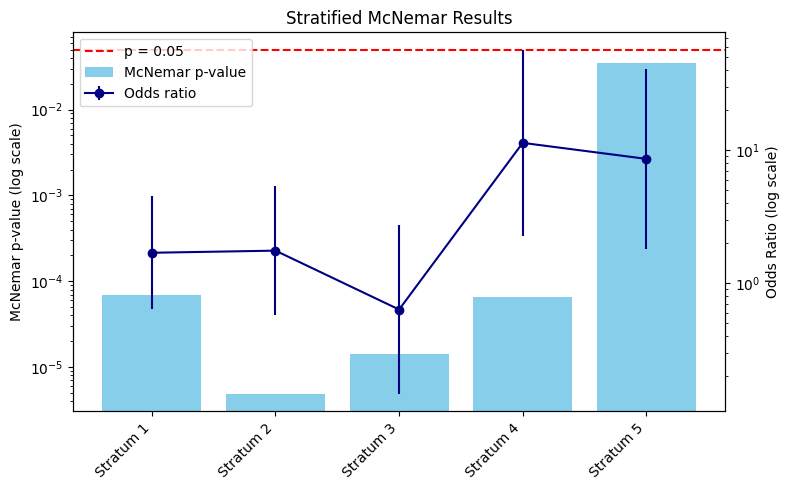

Stratified McNemar p = {'oddsratio': 10.346779435542068, 'pvalue': 0.0012970077527018065}


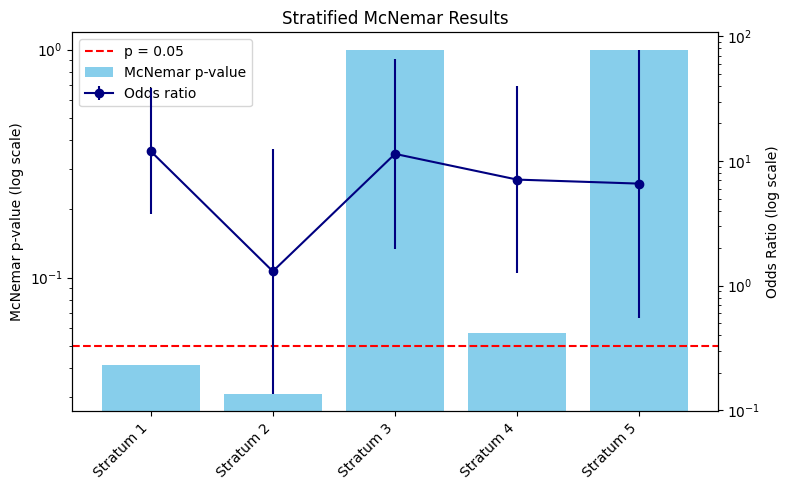

Stratified McNemar p = {'oddsratio': 35.840210605009375, 'pvalue': 2.1418149476204462e-09}


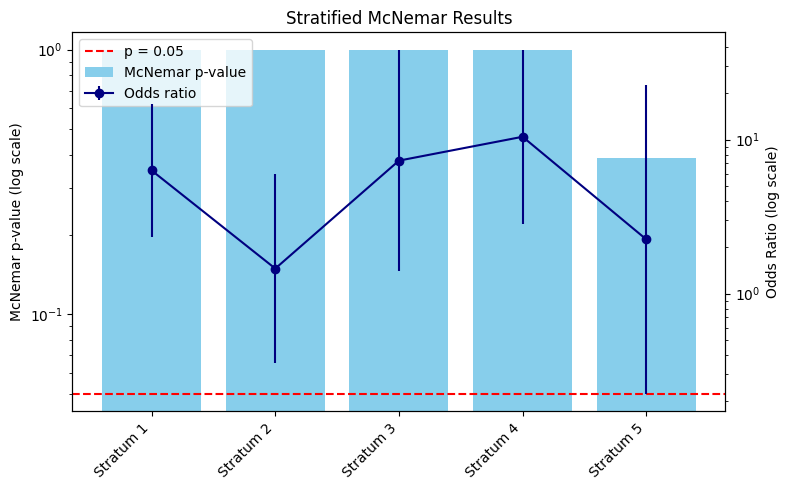

Stratified McNemar p = {'oddsratio': 30.127103079719568, 'pvalue': 4.046364399101776e-08}


In [20]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="system_num_interactions",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="system_num_interactions",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="system_num_interactions",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

### ligand_num_neighboring_residues

### ligand_num_interacting_residues

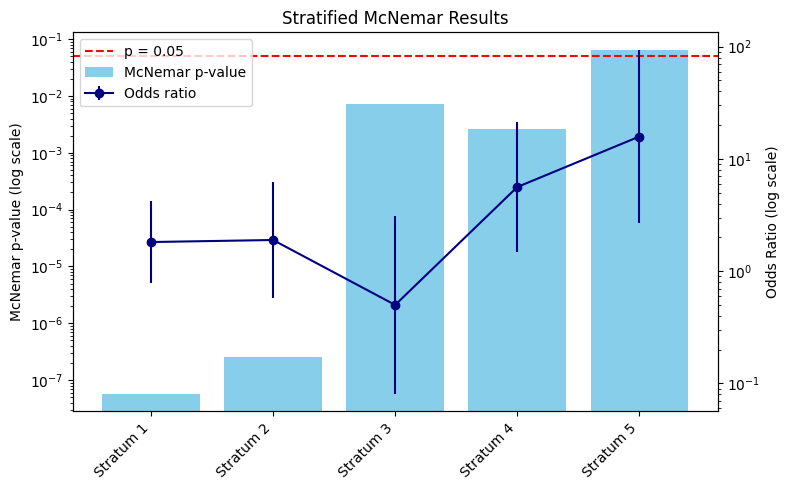

Stratified McNemar p = {'oddsratio': 10.677626323046562, 'pvalue': 0.0010843911898353875}


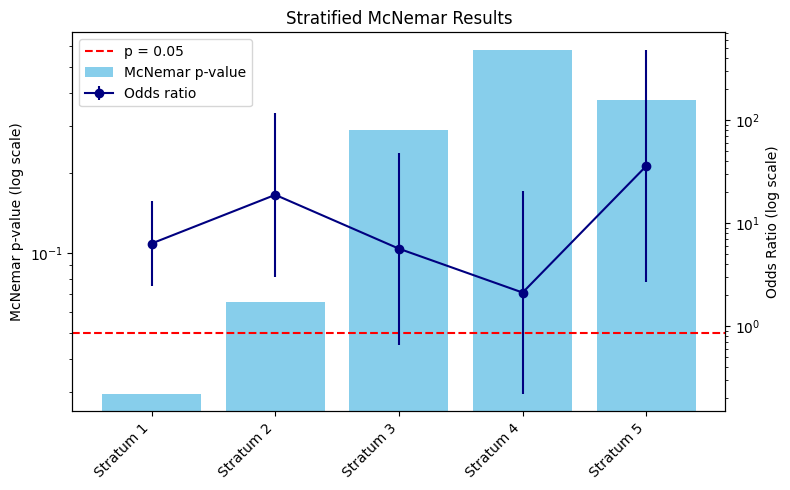

Stratified McNemar p = {'oddsratio': 37.76987288223529, 'pvalue': 7.960165859799417e-10}


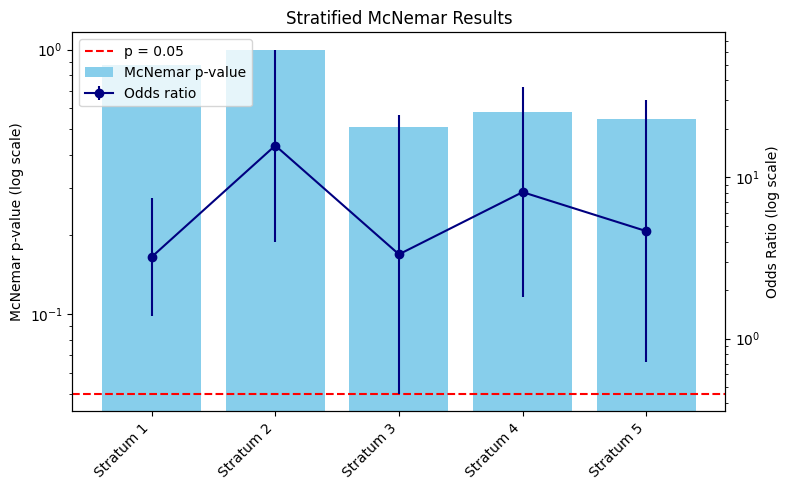

Stratified McNemar p = {'oddsratio': 33.25845272775798, 'pvalue': 8.068825829710136e-09}


In [21]:
# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only"],
    methods_group2=["icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_interacting_residues",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only","surfdock", "chai-1"],
    methods_group2=["vina", "gnina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_interacting_residues",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

# stratified_analysis = property_analysis.stratified_success_analysis(
stratified_analysis = property_analysis.stratified_mcnemar_analysis(
    methods_group1=["diffdock_pocket_only", "chai-1", "surfdock"],
    methods_group2=["vina", "icm"],
    rmsd_threshold=2.0,
    property_name="ligand_num_interacting_residues",
)

print("Stratified McNemar p =", stratified_analysis['cmh'])

## Distribution of the features

In [8]:
properties = [
    "ligand_num_rot_bonds",
    "ligand_num_hbd",
    "ligand_num_hba",
    "ligand_num_rings",
    "entry_resolution",
    "entry_validation_molprobity",
    "syestem_num_interactions",
    "ligand_molecular_weight",
    "ligand_crippen_clogp",
    "ligand_num_interacting_residues",
    "ligand_num_neighboring_residues",
]

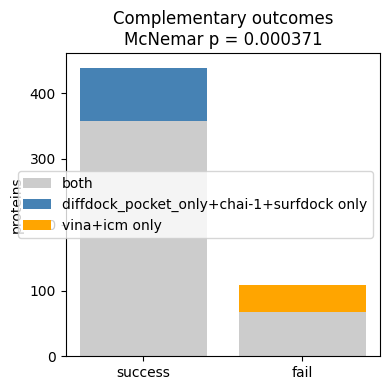

              count        mean      median         std         min  \
group                                                                 
both_failure     30  485.868423  455.274265  161.499827  204.089878   
both_success    334  367.735596  340.030781  113.478194  164.068474   
method1_only     44  431.437438  432.631590  158.314593  204.089878   
method2_only     39  357.467666  342.116212  112.370642  164.068474   

                     max  
group                     
both_failure  797.022883  
both_success  778.090099  
method1_only  787.430050  
method2_only  669.134943  
{'anova': {'f_stat': 24.399984263020183, 'p_value': 1.2495689593549248e-14}, 'kruskal_wallis': {'stat': 35.70892405128671, 'p_value': 8.628238323065895e-08}}


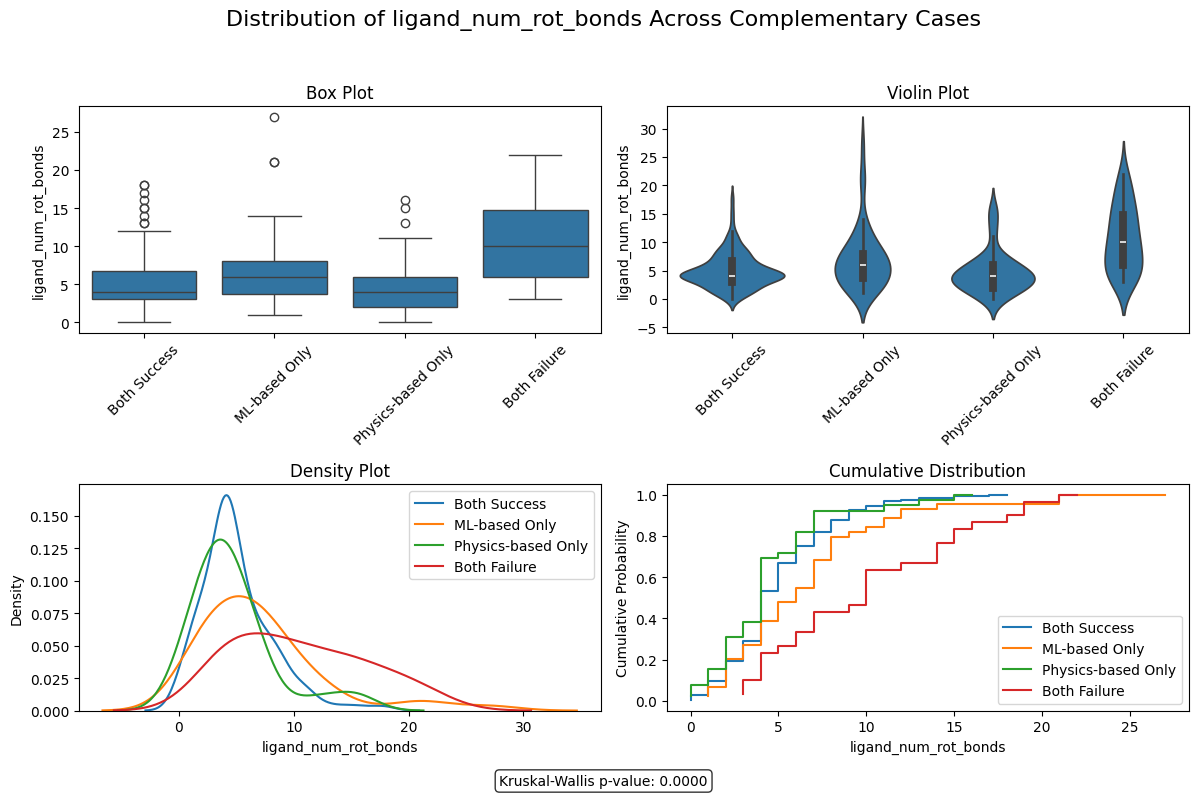

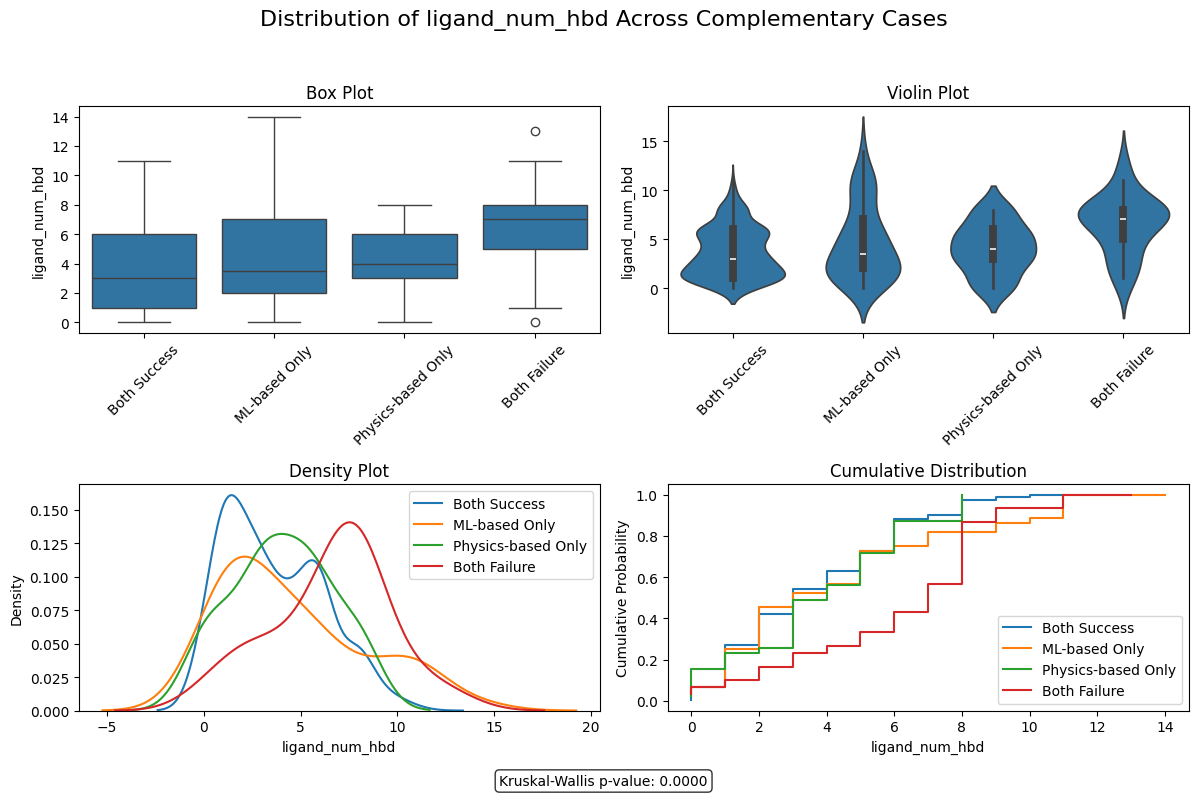

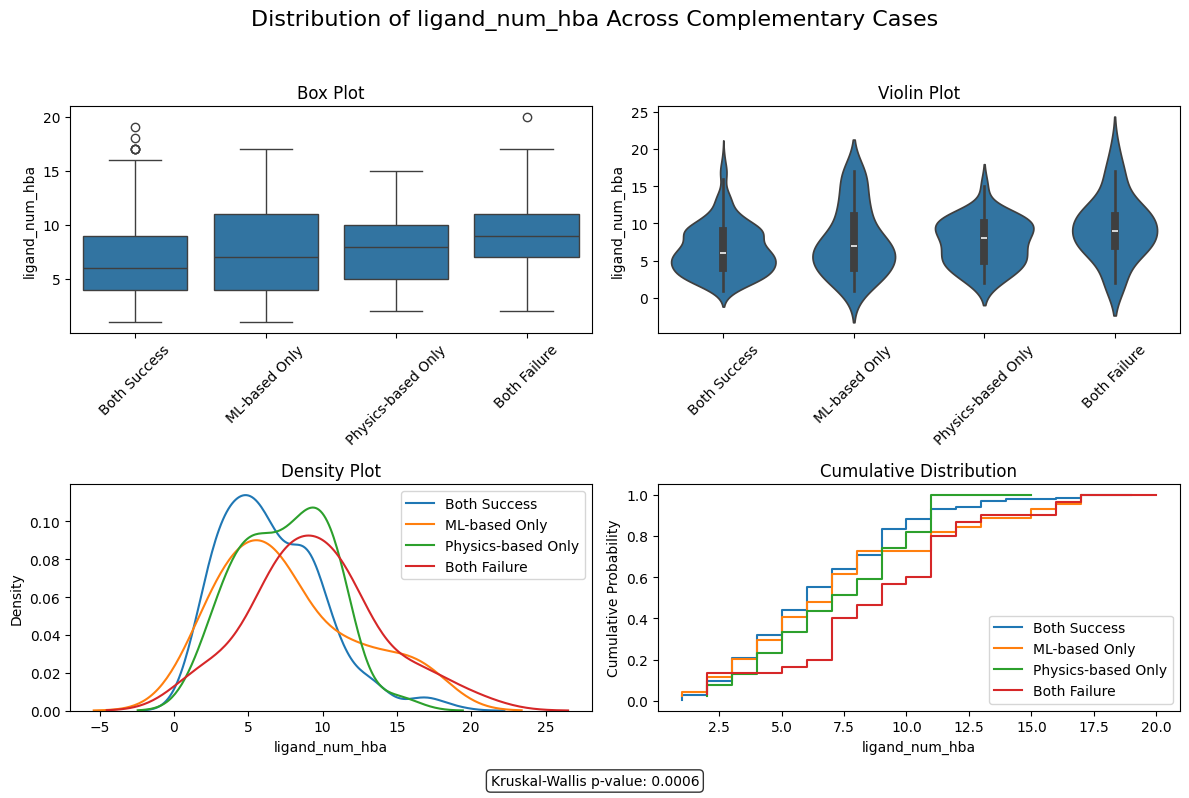

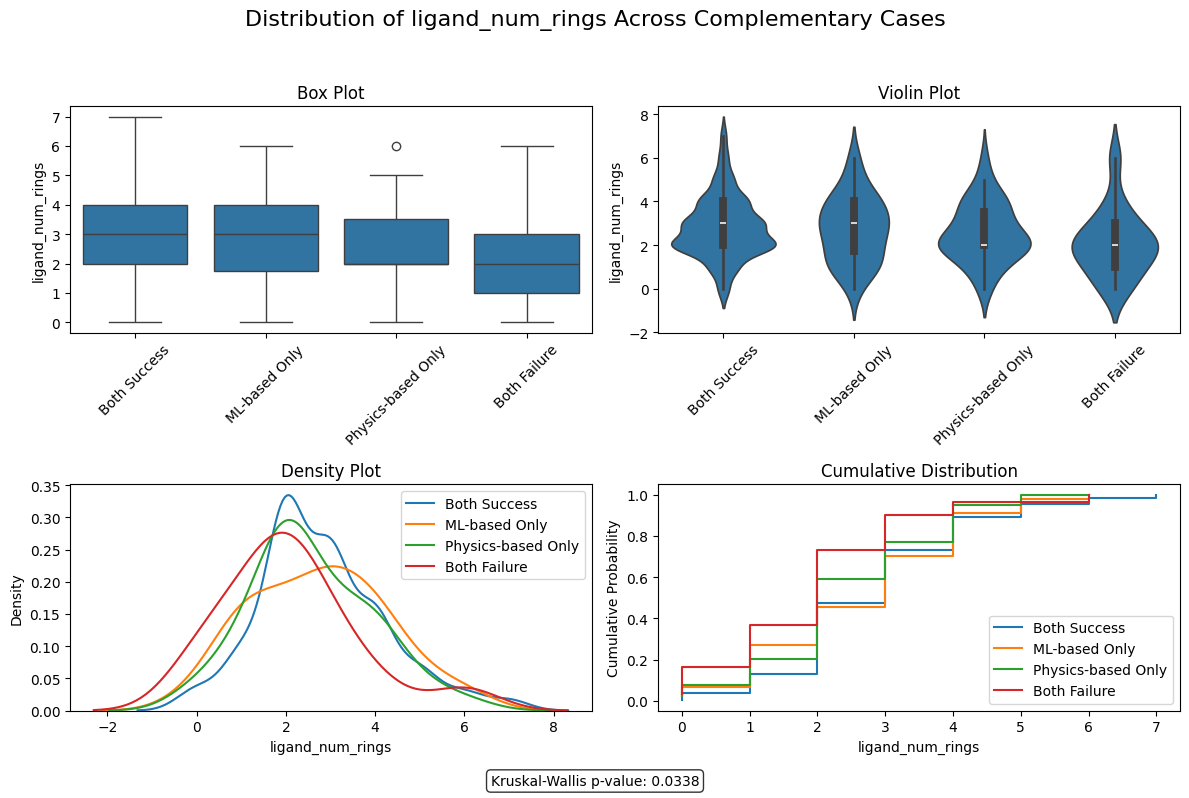

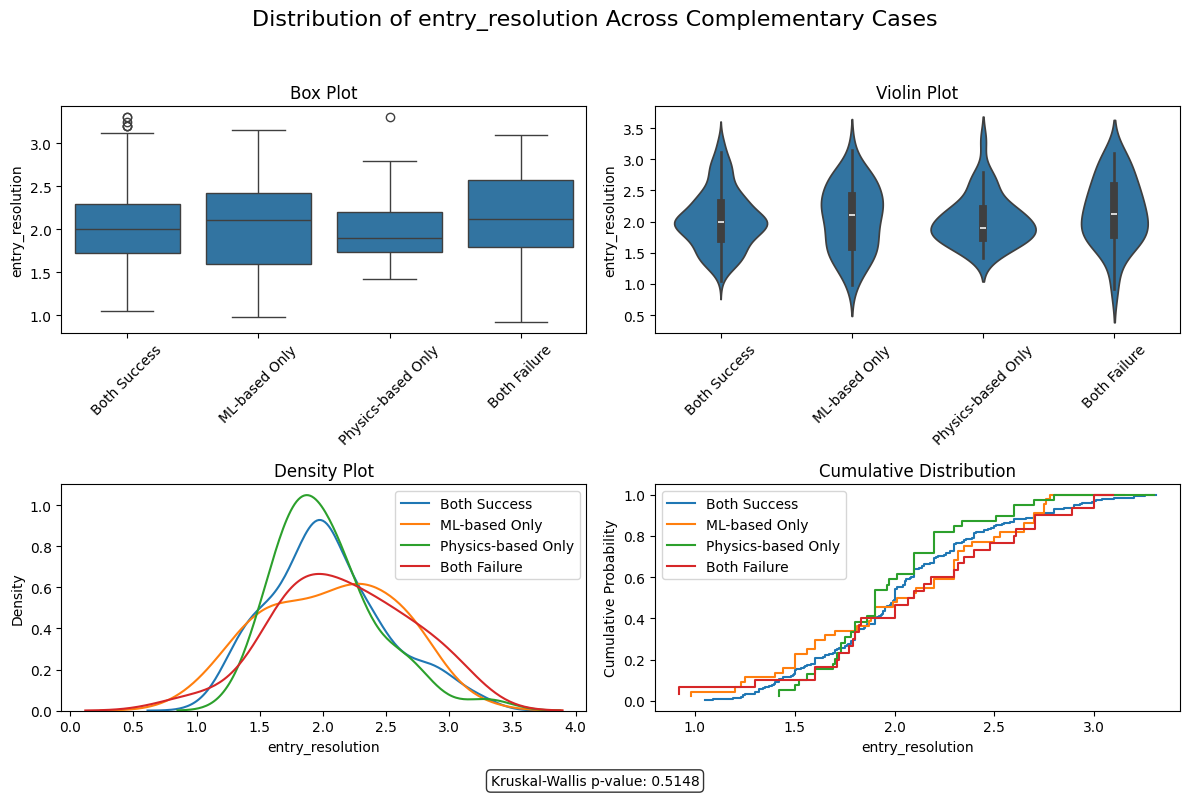

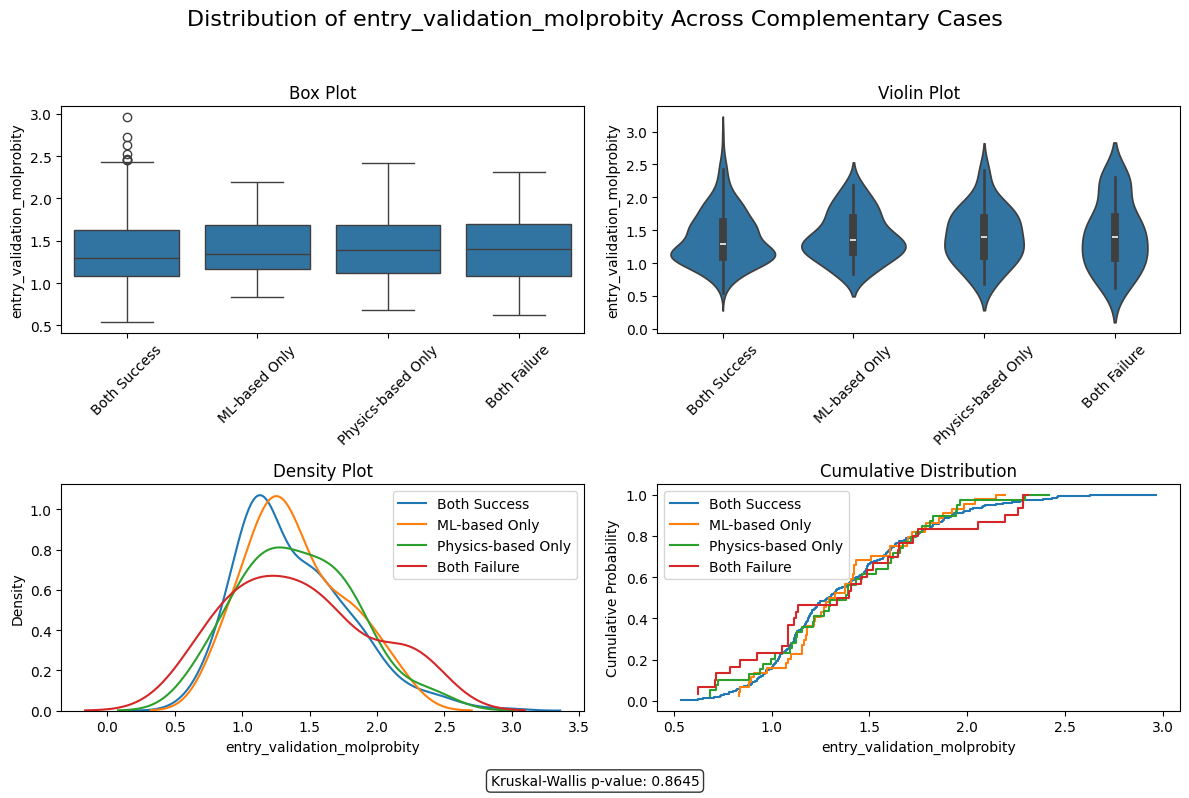

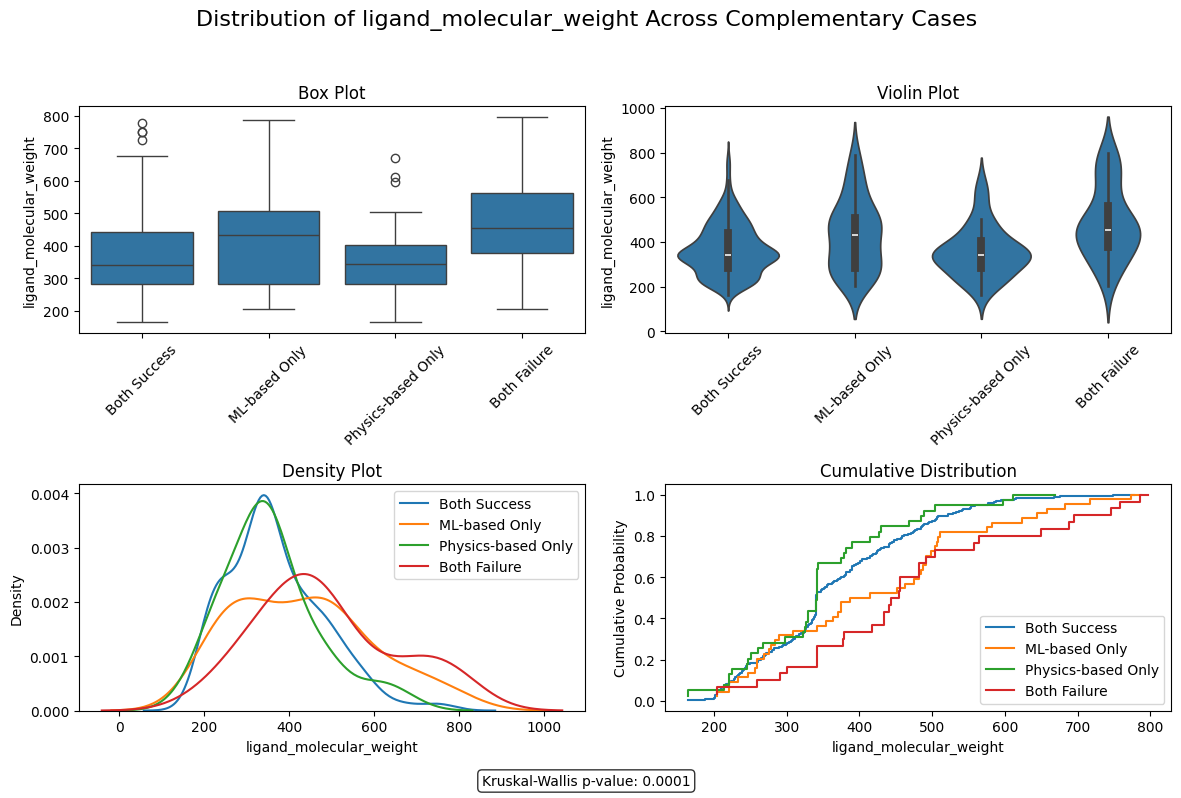

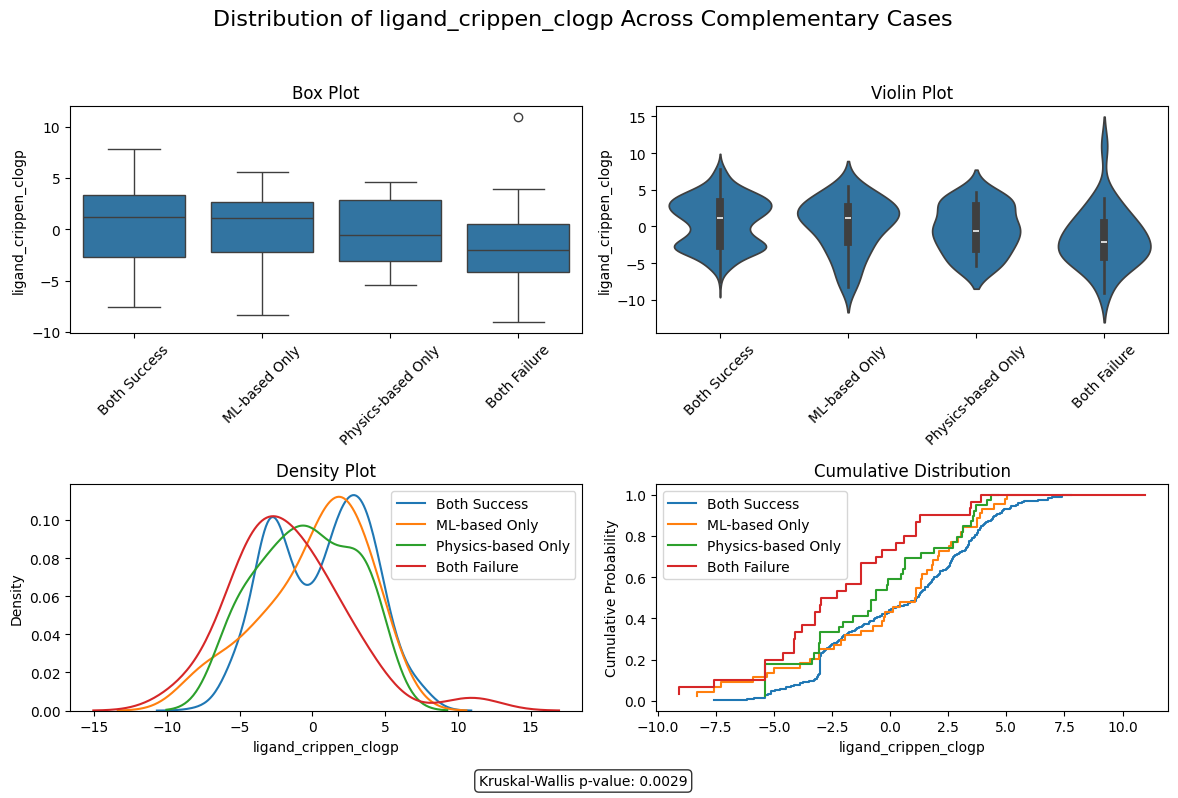

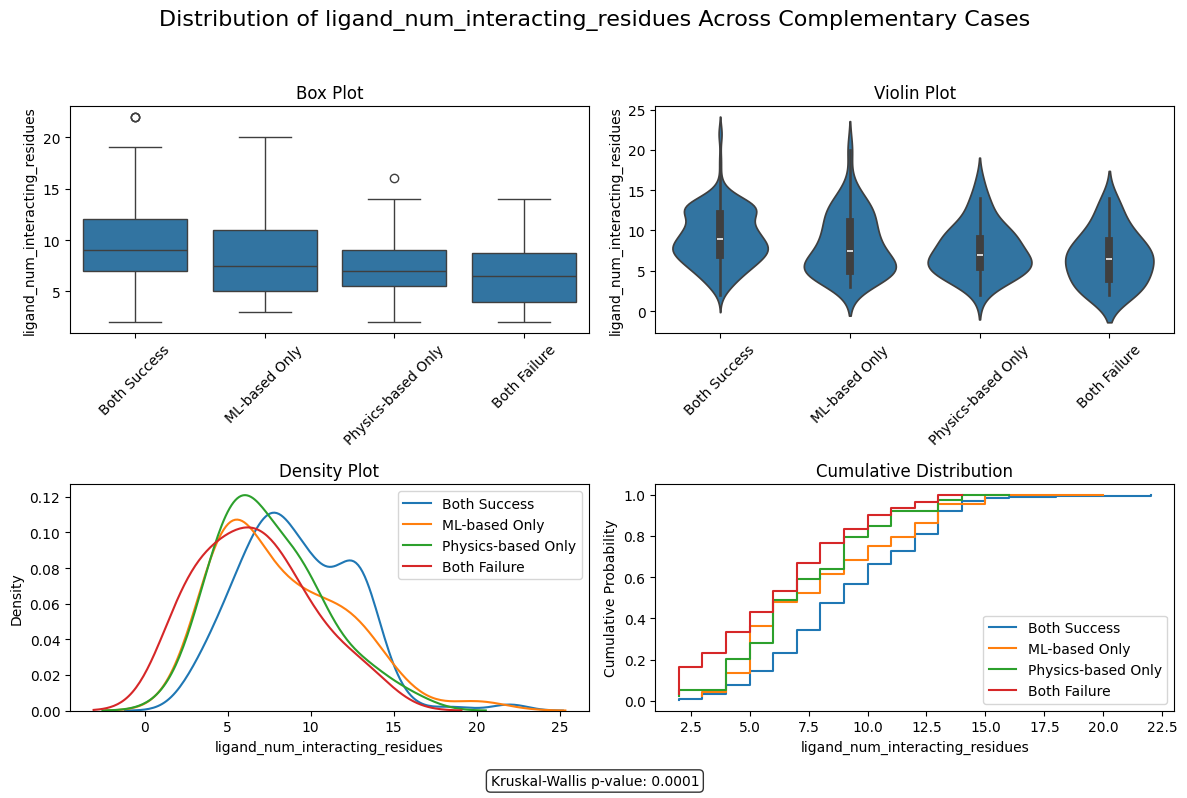

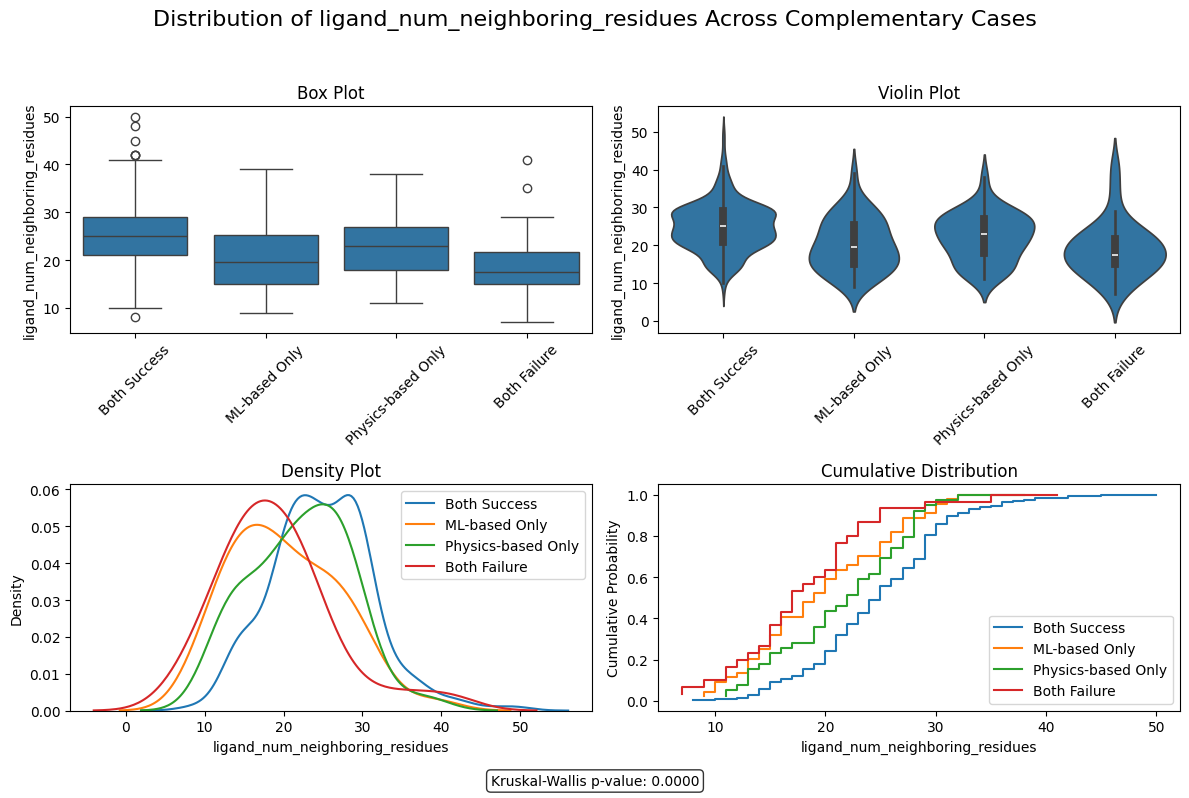

In [11]:
# First run the complementary analysis
property_analysis = PropertyAnalysis(df_combined)
complementary_results = property_analysis.complementary_success_analysis(
    method1=['diffdock_pocket_only', 'chai-1', 'surfdock'],  # ML methods
    method2=['vina', 'icm'],                   # Physics-based methods
    rmsd_threshold=2.0,
    plot=True
)

# Then analyze property distributions across complementary cases
property_distributions = property_analysis.compare_property_distributions_in_complementary_cases(
    complementary_results=complementary_results,
    properties=properties,
    method_labels=('ML-based', 'Physics-based'),
    property_types={
        'ligand_molecular_weight': 'continuous',
        'ligand_num_rot_bonds': 'continuous',
        'ligand_num_hbd': 'continuous',
        'ligand_num_hba': 'continuous',
        'ligand_num_rings': 'continuous',
        'entry_resolution': 'continuous',
        'entry_validation_molprobity': 'continuous',
        'system_num_interactions': 'continuous',
        'ligand_crippen_clogp': 'continuous',
        'ligand_num_interacting_residues': 'continuous',
        'ligand_num_neighboring_residues': 'continuous'
    },
    plot=True
)

# To view the summary statistics
print(property_distributions['summary_stats']['ligand_molecular_weight'])

# To access the statistical test results
print(property_distributions['test_results']['ligand_num_rot_bonds'])

# Follow-up analysis

### correlation between ligand_num_hbd and ligand_crippen_clogp

In [14]:
from scipy.stats import pearsonr
r, p = pearsonr(df_combined['ligand_num_hbd'].fillna(0), df_combined['ligand_crippen_clogp'].fillna(0)) 
print(f"r = {r:.2f}, p = {p:.1e}")

r = -0.70, p = 0.0e+00


### Ring-count × Rotatable-bond interaction
	•	Ring count and rotatable bonds (RBs) capture different flavours of flexibility:
	•	Too few rings → high RBs → entropic penalty & sampling explosion.
	•	Too many fused rings → RBs “frozen” but ligand may become too planar/rigid to explore alternate poses.
	•	The difficult corners lie where the two variables disagree:
	•	Low rings / high RBs = floppy aliphatic chains.
	•	High rings / low RBs = flat polycycles (PAHs, macrocycles).

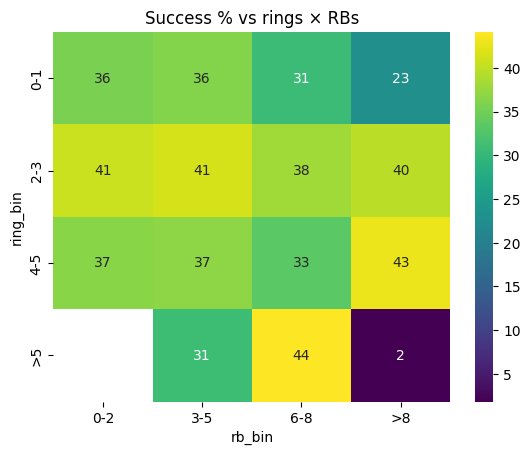

In [19]:
# 2-D heat map of success rate
df_combined['success'] = df_combined['rmsd_≤_2å']
heat = (
    df_combined.assign(
        ring_bin = pd.cut(df_combined.ligand_num_rings, bins=[0,1,3,5,99], labels=['0-1','2-3','4-5','>5']),
        rb_bin   = pd.cut(df_combined.ligand_num_rot_bonds, bins=[0,2,5,8,99], labels=['0-2','3-5','6-8','>8'])
    )
    .groupby(['ring_bin','rb_bin'])['success']
    .mean()
    .unstack()
)
sns.heatmap(heat*100, annot=True, fmt='.0f', cmap='viridis'); plt.title('Success % vs rings × RBs');

### mixed effect analysis

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Define variables with standardized naming for consistency
df_combined['ring_c'] = df_combined.ligand_num_rings
df_combined['rb_c'] = df_combined.ligand_num_rot_bonds

# Ensure success is properly defined as a binary integer
df_combined['success'] = (df_combined['rmsd'] <= 2.0).astype(int)

# Use mixed effects logistic regression with an interaction term
m_int = smf.mixedlm(
    'rmsd ~ ring_c * rb_c + C(method)',
    data=df_combined, 
    groups=df_combined['protein'],
    family=sm.families.Binomial()  # This is key for binary outcomes
).fit()
print(m_int.summary())

<Axes: xlabel='ligand_num_rings', ylabel='ligand_num_rot_bonds'>

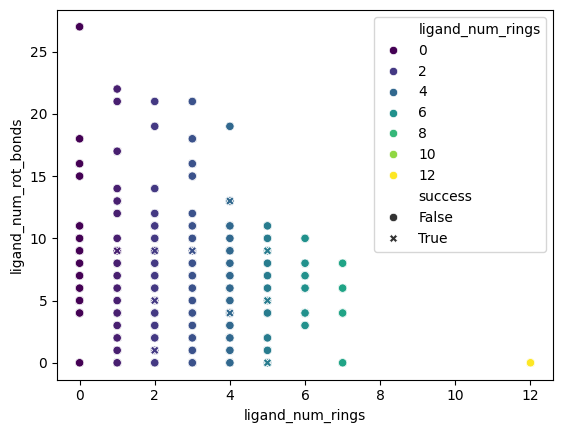

In [23]:
sns.scatterplot(
    x='ligand_num_rings', y='ligand_num_rot_bonds',
    hue='ligand_num_rings', style='success', data=df_combined, palette='viridis'
)

### molecular weight

In [33]:
# Fraction of successes by MW band
best_rmsd_df = df_combined.groupby('protein').apply(
    lambda x: x.loc[x['rmsd'].idxmin()] if not x['rmsd'].isna().all() else x.iloc[0]
).reset_index(drop=True)

best_rmsd_df['mw_bin'] = pd.cut(best_rmsd_df.ligand_molecular_weight, bins=[0,300,400,500,800])
success_rate = best_rmsd_df.groupby('mw_bin')['success'].mean()*100
print(success_rate)

df_combined['mw_bin'] = pd.cut(df_combined.ligand_molecular_weight, bins=[0,300,400,500,800])
success_rate = df_combined.groupby('mw_bin')['success'].mean()*100
print(success_rate)

mw_bin
(0, 300]      98.333333
(300, 400]    98.224852
(400, 500]    89.898990
(500, 800]    88.888889
Name: success, dtype: float64
mw_bin
(0, 300]      39.419215
(300, 400]    40.449438
(400, 500]    34.637965
(500, 800]    34.327577
Name: success, dtype: float64


### ligand_num_interactions and ligand size

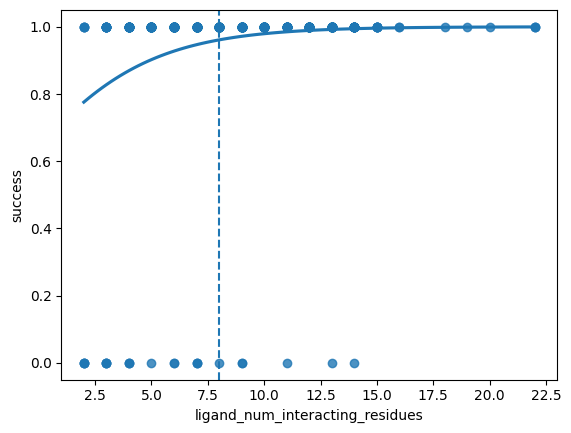

In [34]:
# Quick logistic curve
sns.regplot(x='ligand_num_interacting_residues', y='success', data=best_rmsd_df,
            logistic=True, ci=None); plt.axvline(8, ls='--')

In [ ]:
# Mixed-effects with size & polarity
m = smf.mixedlm(
    'rmsd ~ ligand_num_interacting_residues + ligand_molecular_weight + ligand_num_hbd + ligand_num_hba + C(method)',
    groups=best_rmsd_df['protein'], data=best_rmsd_df, family=sm.families.Binomial()
).fit()

### MW * rotatable bonds 

### MW * rotatable bonds interactino study 

In [44]:
# ──  PREP  ──────────────────────────────────────────────────────────────
df = df_combined.copy()

# best pose per protein–method pair, then “success” flag
df = (
    df.sort_values('rmsd')
      .groupby(['protein', 'method'])
      .first()
      .reset_index()
)
thr = 2.0           # success threshold
df['success'] = (df['rmsd'] <= thr).astype(int)

# make sure you’ve columns 'ligand_molecular_weight' & 'num_rotatable_bonds'
df['mw']  = df['ligand_molecular_weight']
df['rb']  = df['ligand_num_rot_bonds']

In [45]:
# Define “heavy” as MW > 500 Da (change if you like)
# Define “rigid” as RB <= 6    (tune after inspecting histogram)
df['weight_cat'] = np.where(df['mw'] > 500, 'heavy', 'normal')
df['flex_cat']   = np.where(df['rb'] > 6, 'floppy', 'rigid')

# Cross-tab success rates
pivot = (
    df.pivot_table(
        values='success',
        index='weight_cat',
        columns='flex_cat',
        aggfunc='mean'
    ) * 100
)
print(pivot)   # success % table

flex_cat       floppy      rigid
weight_cat                      
heavy       57.281553  66.666667
normal      56.202532  58.368495


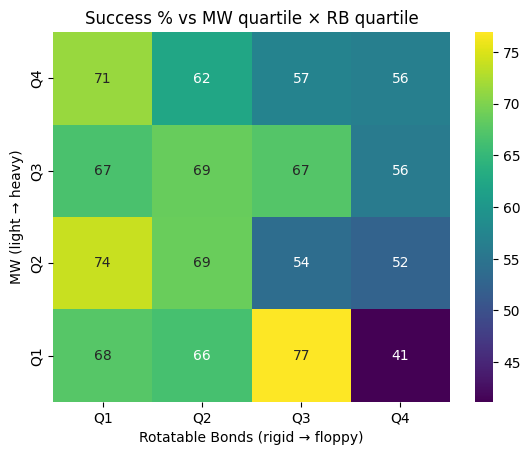

In [46]:
# Quantile bins work well → 4×4 grid
df['mw_bin'] = pd.qcut(df['mw'], 4, labels=['Q1','Q2','Q3','Q4'])  # Q4 = heaviest
df['rb_bin'] = pd.qcut(df['rb'], 4, labels=['Q1','Q2','Q3','Q4'])  # Q4 = floppiest

heat = (
    df.groupby(['mw_bin','rb_bin'])['success']
      .mean()
      .unstack()
      .sort_index(ascending=False)   # heavies at top
)

import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(heat*100, annot=True, fmt='.0f', cmap='viridis')
plt.title('Success % vs MW quartile × RB quartile')
plt.ylabel('MW (light → heavy)'); plt.xlabel('Rotatable Bonds (rigid → floppy)')
plt.show()

“Heavy and floppy ligands are the worst.”

In [ ]:
from statsmodels.genmod.bayes_mixed_glm import BinomialBayesMixedGLM
# Prepare centred covariates
for col in ['mw','rb','clogP','hba','hbd']:
    df[col+'_c'] = (df[col]-df[col].mean())/df[col].std()

formula = ('success ~ mw_c*rb_c + clogP_c + hba_c + hbd_c'
           '          + C(method)')

df['protein'] = df['protein'].astype('category')
vc = {'protein': '0 + C(protein)'}   # random intercept
# vc = {'protein': '1'}
model = BinomialBayesMixedGLM.from_formula(formula, vc, df)
fit   = model.fit_vb()               # or .fit_map()

print(fit.summary())

#### Controlling for Polarity (logP/HBA/HBD)

In [48]:
df['clogP'] = df['ligand_crippen_clogp']
df['hbd']   = df['ligand_num_hbd']
df['hba']   = df['ligand_num_hba']

# Optionally standardise
for col in ['clogP','hbd','hba']:
    df[col+'_c'] = (df[col] - df[col].mean())/df[col].std()

In [ ]:
formula = (
    'success ~ mw_c + clogP_c + hbd_c + hba_c + '
    'mw_c:rb_c + C(method)'
)
model_poly = smf.mixedlm(
    formula,
    data=df, groups=df['protein'],
    family=sm.families.Binomial()
).fit()
print(model_poly.summary())